In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

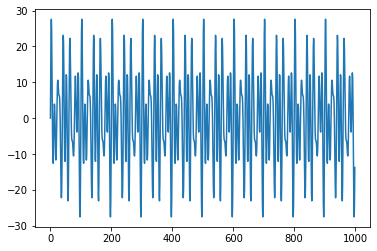

In [95]:
#產生10Hz 20Hz 30Hz 40Hz的混合訊號

num_samples = 1000
amplitude = 10
time = np.linspace(0,1,num_samples, endpoint=False)
#time = np.arange(num_samples)
newwave = np.zeros(num_samples)
freq_list = [50,80,100]
for freq in freq_list:
    wave_part = amplitude * np.sin(2 * np.pi * freq * time)
    newwave += wave_part
plt.plot( newwave)
plt.show()

In [96]:
#小波分析
sig = newwave
wavename = 'morl'
delta_t = time[1]-time[0]


delta_j = 0.125

#s0 is the smallest resolvable scale
s0 = 2 * delta_t

'''
The choice of a sufficiently small delta_j  depends on the width in spectral-space of the wavelet function
For the Morlet wavelet , a delta_j of about 0.5 is the largest value that still gives adequate sampling in scale,
while for the other wavelet functions, a lager value can be used.
Smaller values of delta_j give finer resolution.
'''

#J determines the largest scale 
J = (1/delta_j) * np.log2(num_samples * delta_t/s0)
J = np.ceil(J)
J = int(J)

print(J)

#計算每個scale的數值
sj = []
for j in np.arange(J+1):
    t = s0 * (2 **(j * delta_j)) 
    t = 1/t
    sj.append(t)
    

72


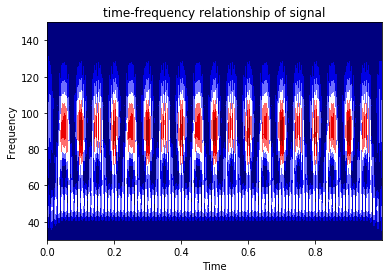

In [98]:

sampling_period = delta_t
scales = sj
cwtmatr, freqs = pywt.cwt(sig, scales, wavename, sampling_period)

power = (abs(cwtmatr)) ** 2
period = 1. / freqs    #週期是頻率的倒數

#plt.contourf(time, period, power,cmap=plt.cm.seismic)
plt.contourf(time, freqs, power,cmap=plt.cm.seismic)
plt.title('time-frequency relationship of signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(30,150)
#plt.gca().invert_yaxis()

plt.show()